In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("daily.csv")#read dataframe from csv file

In [4]:
df.info()#check dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11173 entries, 0 to 11172
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stn Id                11173 non-null  int64  
 1   Stn Name              11173 non-null  object 
 2   CIMIS Region          11173 non-null  object 
 3   Date                  11173 non-null  object 
 4   Jul                   11173 non-null  int64  
 5   ETo (in)              11173 non-null  float64
 6   qc                    11173 non-null  object 
 7   Precip (in)           11173 non-null  float64
 8   qc.1                  11173 non-null  object 
 9   Sol Rad (Ly/day)      11173 non-null  int64  
 10  qc.2                  11173 non-null  object 
 11  Net Rad (Ly/day)      11140 non-null  float64
 12  qc.3                  11173 non-null  object 
 13  Max Vap Pres (mBars)  11173 non-null  float64
 14  qc.4                  11173 non-null  object 
 15  Min Vap Pres (mBars

In [5]:
df.head()#check head

,Stn Id,Stn Name,CIMIS Region,Date,Jul,ETo (in),qc,Precip (in),qc.1,Sol Rad (Ly/day),...,Wind Run (miles),qc.23,Max Soil Temp (F),qc.24,Min Soil Temp (F),qc.25,Avg Soil Temp (F),qc.26,Batt Volt (VDC),qc.27
0,6,Davis,Sacramento Valley,1/1/20,1,0.03,,0.00,,141,...,64.6,,50.8,,47.5,,48.8,,12.7,
1,6,Davis,Sacramento Valley,1/2/20,2,0.06,,0.00,,219,...,99.6,,50.3,,46.4,,48.2,,12.7,
2,6,Davis,Sacramento Valley,1/3/20,3,0.04,,0.00,,193,...,54.2,,50.6,,46.1,,48.2,,12.7,
3,6,Davis,Sacramento Valley,1/4/20,4,0.04,,0.02,,180,...,115.3,,51.2,,47.8,,49.1,,12.7,
4,6,Davis,Sacramento Valley,1/5/20,5,0.05,,0.00,,237,...,83.3,,50.7,,46.3,,48.4,,12.8,


In [6]:
#preprocess data
df_dropped = df.drop(['Stn Id', 'Jul', 'qc', 'qc.1', 'qc.2', 'qc.3', 'qc.4', 'qc.5', 'qc.6', 'qc.7',
                     'qc.8', 'qc.9', 'qc.10', 'qc.11', 'qc.12', 'qc.13', 'qc.14', 'qc.15', 'qc.16',
                     'qc.17', 'qc.18', 'qc.19', 'qc.20', 'qc.21', 'qc.22', 'qc.23', 'qc.24', 'qc.25',
                     'qc.26', 'qc.27'], axis = 1)#drop unwanted columns

In [7]:
df_dropped.head()#check if dropped

,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Net Rad (Ly/day),Max Vap Pres (mBars),Min Vap Pres (mBars),Avg Vap Pres (mBars),...,Rose SSE,Rose SSW,Rose WSW,Rose WNW,Rose NNW,Wind Run (miles),Max Soil Temp (F),Min Soil Temp (F),Avg Soil Temp (F),Batt Volt (VDC)
0,Davis,Sacramento Valley,1/1/20,0.03,0.00,141,38.0,12.4,8.8,10.2,...,0.12,0.11,0.09,0.10,0.17,64.6,50.8,47.5,48.8,12.7
1,Davis,Sacramento Valley,1/2/20,0.06,0.00,219,67.0,11.9,7.3,9.1,...,0.27,0.05,0.03,0.05,0.24,99.6,50.3,46.4,48.2,12.7
2,Davis,Sacramento Valley,1/3/20,0.04,0.00,193,64.0,12.3,7.1,9.8,...,0.27,0.23,0.08,0.03,0.01,54.2,50.6,46.1,48.2,12.7
3,Davis,Sacramento Valley,1/4/20,0.04,0.02,180,51.0,13.0,8.8,10.9,...,0.11,0.04,0.04,0.01,0.14,115.3,51.2,47.8,49.1,12.7
4,Davis,Sacramento Valley,1/5/20,0.05,0.00,237,77.0,11.4,7.1,9.0,...,0.05,0.02,0.03,0.12,0.24,83.3,50.7,46.3,48.4,12.8


In [8]:
df_dropped.isnull().sum()#check missing data

Stn Name                 0
CIMIS Region             0
Date                     0
ETo (in)                 0
Precip (in)              0
Sol Rad (Ly/day)         0
Net Rad (Ly/day)        33
Max Vap Pres (mBars)     0
Min Vap Pres (mBars)     0
Avg Vap Pres (mBars)     0
Max Air Temp (F)         2
Min Air Temp (F)         7
Avg Air Temp (F)         0
Max Rel Hum (%)          0
Min Rel Hum (%)          0
Avg Rel Hum (%)          0
Dew Point (F)            0
Avg Wind Speed (mph)     0
Rose NNE                 0
Rose ENE                 0
Rose ESE                 0
Rose SSE                 0
Rose SSW                 0
Rose WSW                 0
Rose WNW                 0
Rose NNW                 0
Wind Run (miles)         0
Max Soil Temp (F)       10
Min Soil Temp (F)        6
Avg Soil Temp (F)        0
Batt Volt (VDC)          0
dtype: int64

In [19]:
#use pairplot to see relationships between pairs of variables
#sns.pairplot(df_dropped)
#plt.show() #image size too large unable to upload to gitub so comment it

In [20]:
#heatmap to check how variables are correlated
#plt.figure(figsize=(15, 15))
#sns.heatmap(df_dropped.corr(),annot=True,cmap='viridis',linewidths=.5) 
#plt.show()#image size too large unable to upload to gitub so comment it

In [11]:
df_s = df_dropped.drop(['Net Rad (Ly/day)', 'Avg Vap Pres (mBars)', 'Min Vap Pres (mBars)', 'Max Air Temp (F)', 
                        'Min Air Temp (F)', 'Min Rel Hum (%)', 'Rose NNE', 'Rose ENE', 'Max Rel Hum (%)', 
                        'Rose ESE', 'Rose SSE', 'Rose SSW', 'Rose WSW', 'Rose WNW', 'Rose NNW', 'Min Soil Temp (F)',
                        'Max Soil Temp (F)', 'Wind Run (miles)', 'Batt Volt (VDC)'], axis = 1)#drop unwanted columns based on variables' correlation


In [12]:
df_s.shape#check shape

(11173, 12)

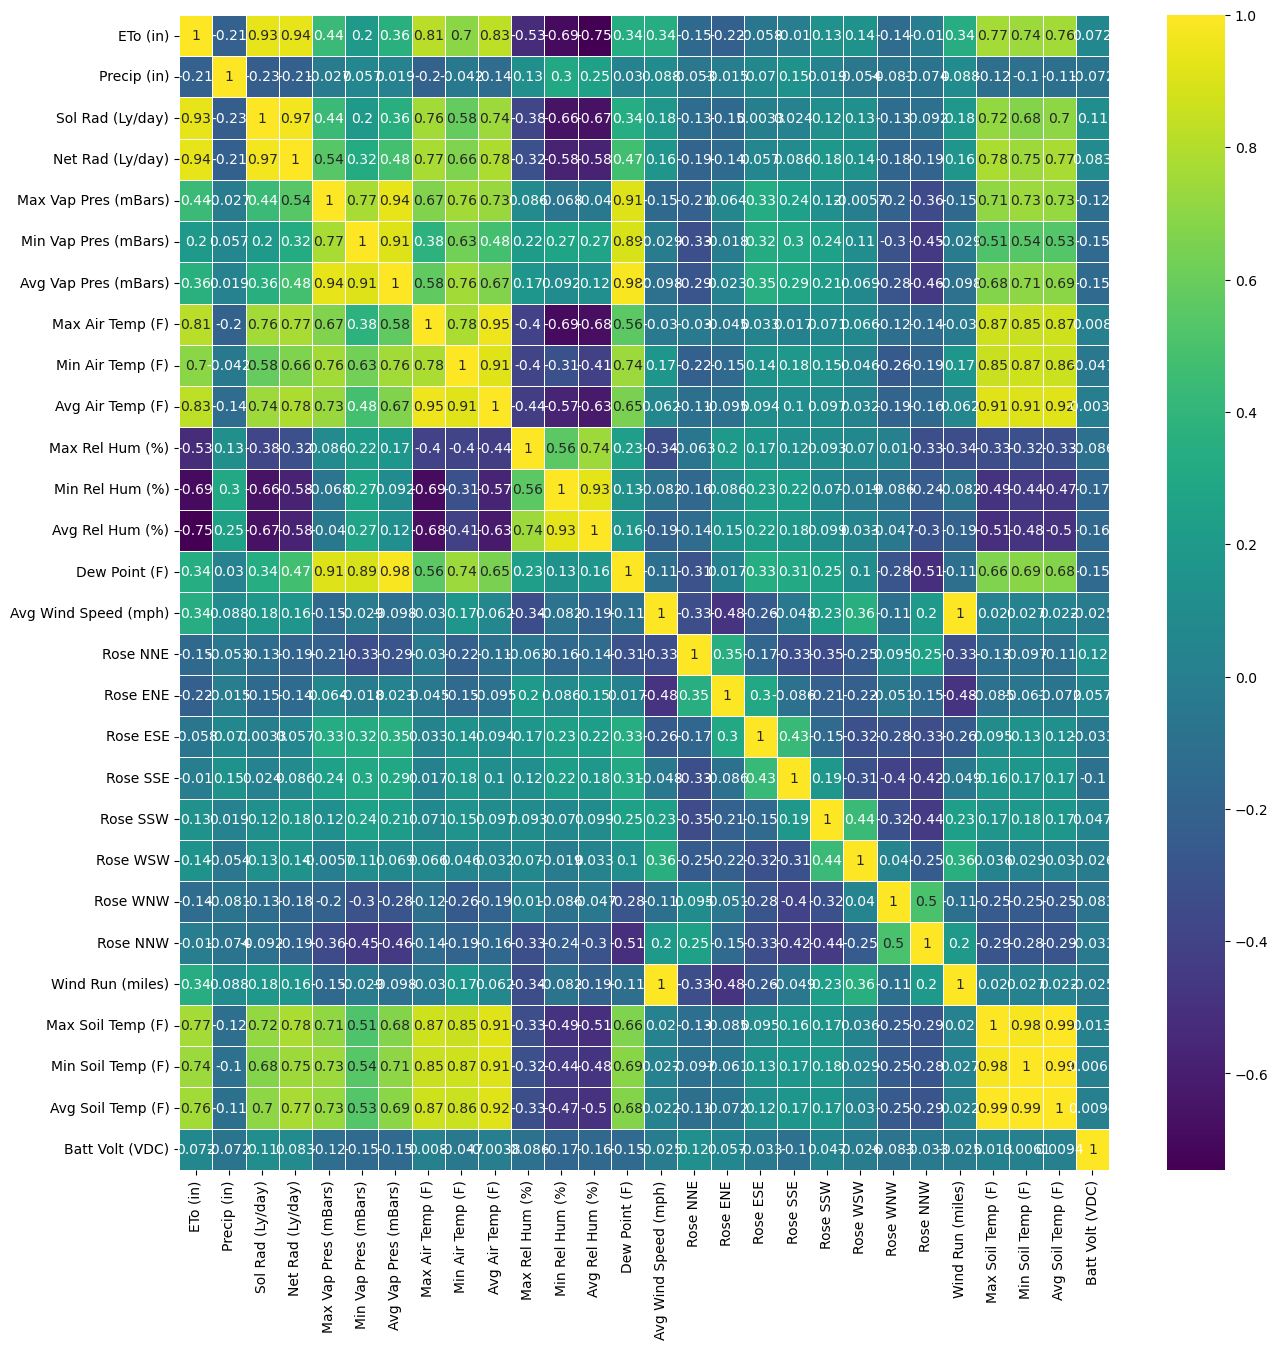

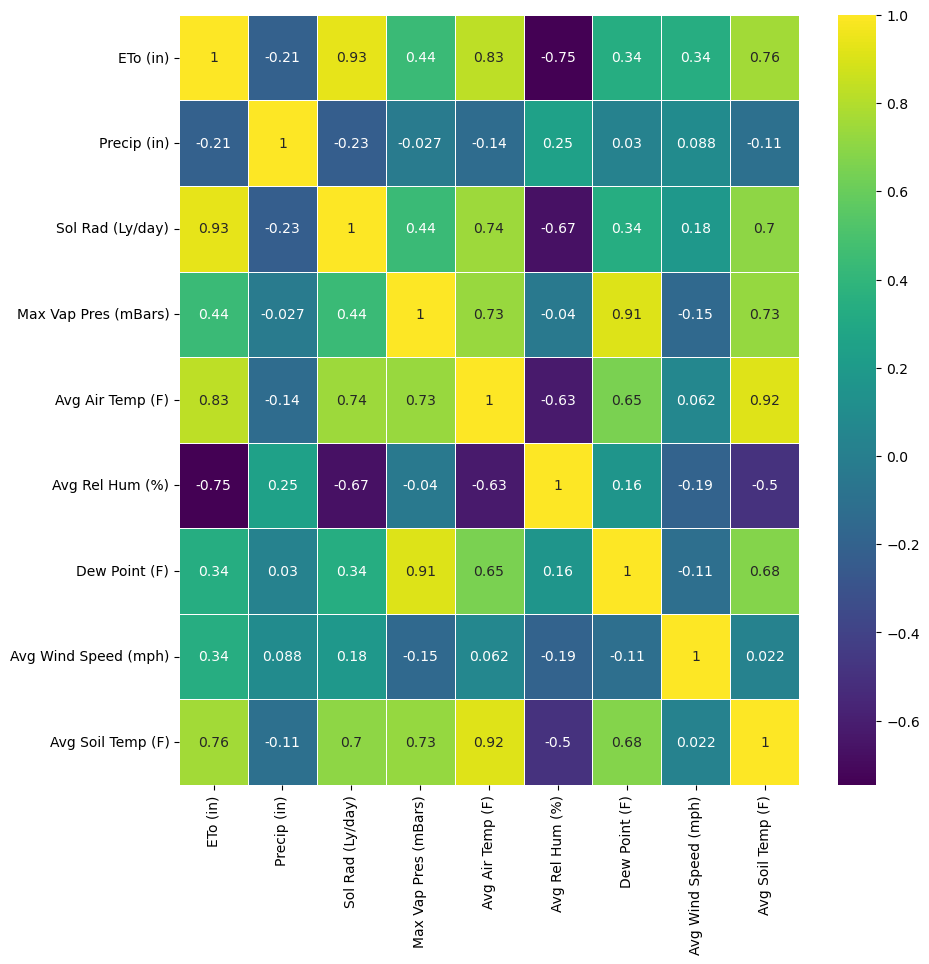

In [13]:
#check heatmap again with selected variables
plt.figure(figsize=(10, 10))
sns.heatmap(df_s.corr(),annot=True,cmap='viridis',linewidths=.5) 
plt.show()

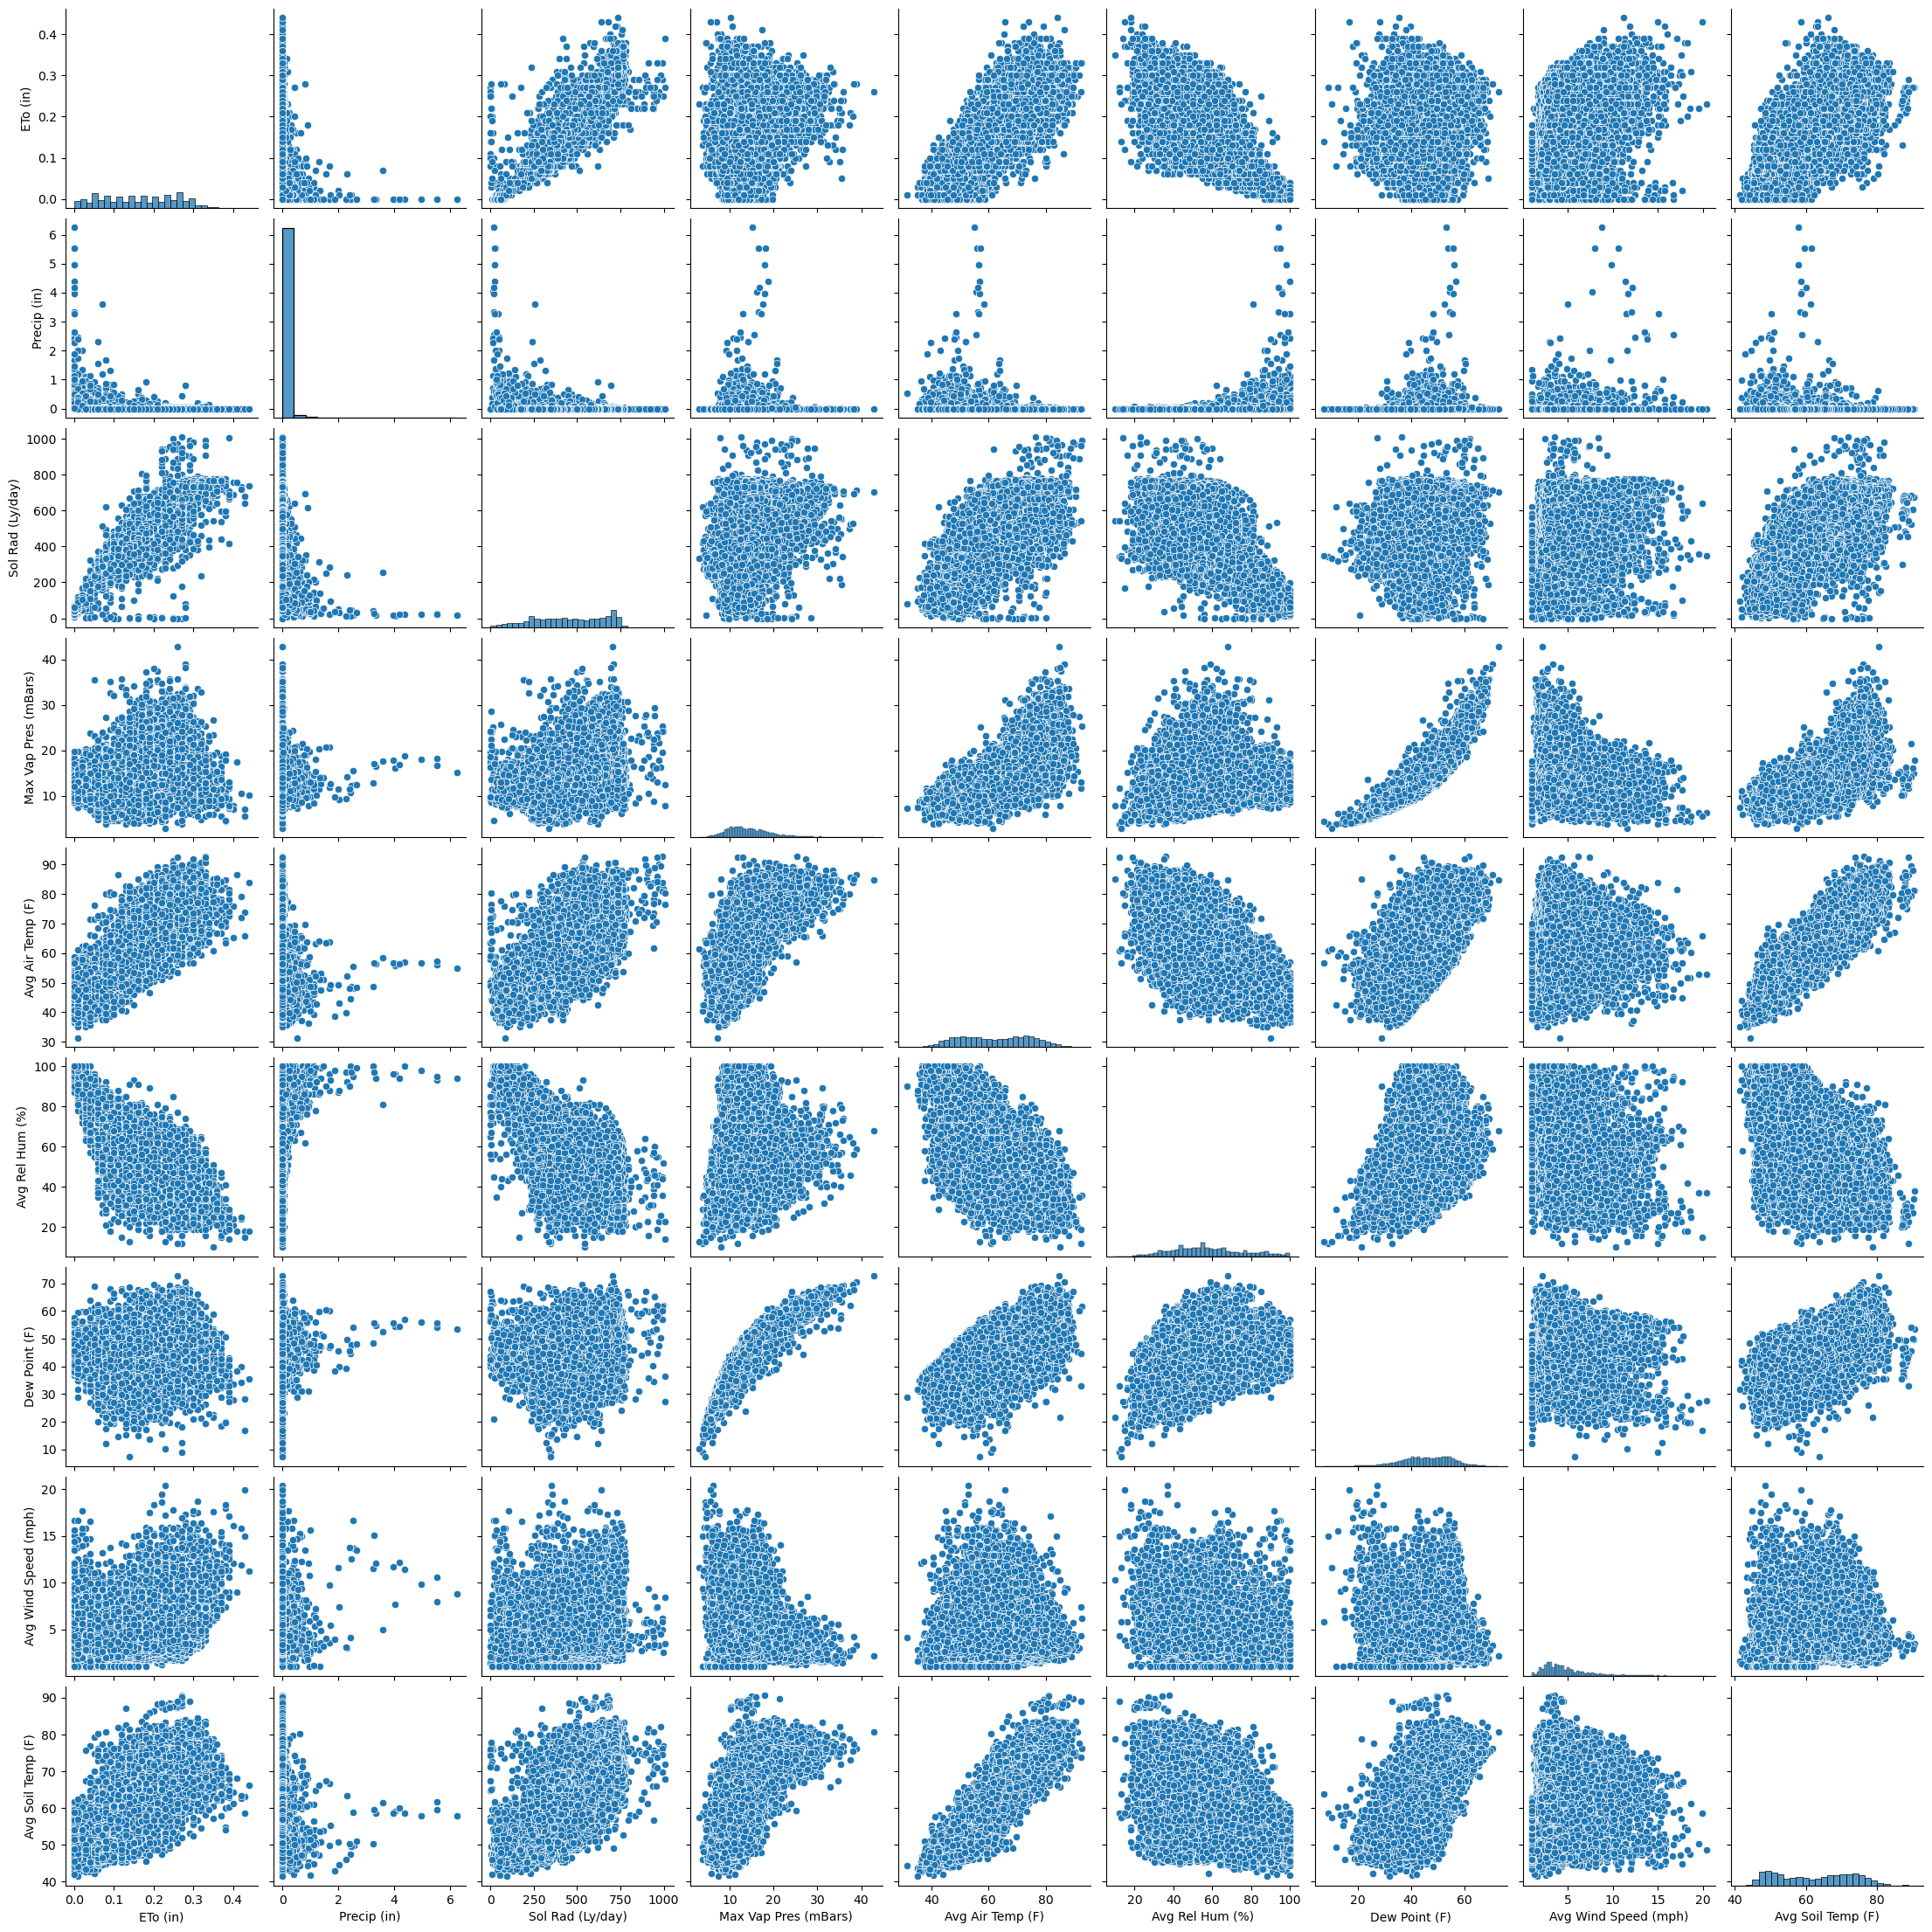

In [21]:
#check with pairplot again
sns.pairplot(df_s)
plt.show()

In [15]:
df_s.head()

,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Max Vap Pres (mBars),Avg Air Temp (F),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Avg Soil Temp (F)
0,Davis,Sacramento Valley,1/1/20,0.03,0.00,141,12.4,47.0,93,45.0,2.7,48.8
1,Davis,Sacramento Valley,1/2/20,0.06,0.00,219,11.9,49.0,77,42.0,4.2,48.2
2,Davis,Sacramento Valley,1/3/20,0.04,0.00,193,12.3,46.5,91,44.0,2.3,48.2
3,Davis,Sacramento Valley,1/4/20,0.04,0.02,180,13.0,48.4,94,46.8,4.8,49.1
4,Davis,Sacramento Valley,1/5/20,0.05,0.00,237,11.4,47.5,80,41.8,3.5,48.4


In [16]:
df_s.isnull().sum()#check missing data

Stn Name                0
CIMIS Region            0
Date                    0
ETo (in)                0
Precip (in)             0
Sol Rad (Ly/day)        0
Max Vap Pres (mBars)    0
Avg Air Temp (F)        0
Avg Rel Hum (%)         0
Dew Point (F)           0
Avg Wind Speed (mph)    0
Avg Soil Temp (F)       0
dtype: int64